# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:

# set up lists to hold reponse info
city_checked=[]
lng = []
lat = []
temp = []
humidity = []
wind = []
cloud = []
country = []
date=[]
record_count=0
set_count=0


# Loop through the list of cities and perform a request for data on each city

    
for i, city in enumerate(cities):
    set_count = i // 50 + 1
    record_count= i % 50 + 1 

    try:
        response = requests.get(query_url + city).json()  
        city_checked.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        country.append(response['sys']['country'])

            #print a print log of each city as it'sbeing processed (with the city number and city name)
        print(f"Processing Record {record_count} of set {set_count} |{city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")

      

Processing Record 1 of set 1 |tadine
Processing Record 2 of set 1 |tomigusuku
Processing Record 3 of set 1 |havelock
Processing Record 4 of set 1 |tarko-sale
Processing Record 5 of set 1 |comodoro rivadavia
Processing Record 6 of set 1 |airai
Processing Record 7 of set 1 |ushuaia
Processing Record 8 of set 1 |severo-kurilsk
Processing Record 9 of set 1 |salalah
Processing Record 10 of set 1 |hirara
Processing Record 11 of set 1 |cape town
Processing Record 12 of set 1 |qaanaaq
Processing Record 13 of set 1 |teguldet
Processing Record 14 of set 1 |torbay
Processing Record 15 of set 1 |upernavik
Processing Record 16 of set 1 |cherskiy
Processing Record 17 of set 1 |tessalit
Processing Record 18 of set 1 |mantamados
Processing Record 19 of set 1 |klaksvik
Processing Record 20 of set 1 |tuktoyaktuk
Processing Record 21 of set 1 |bilma
Processing Record 22 of set 1 |vaini
Processing Record 23 of set 1 |hermanus
Processing Record 24 of set 1 |hobart
Processing Record 25 of set 1 |robertsport

Processing Record 11 of set 5 |margate
Processing Record 12 of set 5 |paro
Processing Record 13 of set 5 |constitucion
Processing Record 14 of set 5 |mattru
Processing Record 15 of set 5 |inirida
Processing Record 16 of set 5 |lundazi
Processing Record 17 of set 5 |nemuro
Processing Record 18 of set 5 |oranjemund
City not found. Skipping...
Processing Record 20 of set 5 |nyurba
Processing Record 21 of set 5 |nicoya
Processing Record 22 of set 5 |pangai
Processing Record 23 of set 5 |longyearbyen
Processing Record 24 of set 5 |binzhou
Processing Record 25 of set 5 |karaton
Processing Record 26 of set 5 |luderitz
Processing Record 27 of set 5 |safford
Processing Record 28 of set 5 |byron bay
Processing Record 29 of set 5 |tahe
City not found. Skipping...
Processing Record 31 of set 5 |murindo
Processing Record 32 of set 5 |codrington
City not found. Skipping...
Processing Record 34 of set 5 |zhigansk
Processing Record 35 of set 5 |inhambane
Processing Record 36 of set 5 |arcata
Processin

City not found. Skipping...
Processing Record 22 of set 9 |yarmouth
Processing Record 23 of set 9 |varhaug
Processing Record 24 of set 9 |irtyshskiy
Processing Record 25 of set 9 |vysokaya gora
Processing Record 26 of set 9 |vila velha
Processing Record 27 of set 9 |altay
Processing Record 28 of set 9 |kudahuvadhoo
Processing Record 29 of set 9 |burgeo
Processing Record 30 of set 9 |san carlos de bariloche
Processing Record 31 of set 9 |eseka
Processing Record 32 of set 9 |soubre
Processing Record 33 of set 9 |mount gambier
Processing Record 34 of set 9 |umred
Processing Record 35 of set 9 |vanderhoof
Processing Record 36 of set 9 |port-gentil
Processing Record 37 of set 9 |dunmore town
Processing Record 38 of set 9 |mongoumba
Processing Record 39 of set 9 |teya
Processing Record 40 of set 9 |kawerau
Processing Record 41 of set 9 |nanga eboko
Processing Record 42 of set 9 |berlevag
Processing Record 43 of set 9 |waingapu
Processing Record 44 of set 9 |sokolo
Processing Record 45 of set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_checked,
    "lng": lng,
    "lat": lat,
    "Max Temp": temp,
    "Humidity": humidity,
    "Wind Speed": wind,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date
    
}
weather_data = pd.DataFrame(weather_dict)

NameError: name 'city_checked' is not defined

In [3]:
# Save the updated dataframe as a csv
weather_data.to_csv("../output_data/weather_data.csv", encoding="utf-8", index=False)
weather_data.head()

NameError: name 'weather_data' is not defined

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        560 non-null    object 
 1   lng         560 non-null    float64
 2   lat         560 non-null    float64
 3   Max Temp    560 non-null    float64
 4   Humidity    560 non-null    int64  
 5   Wind Speed  560 non-null    float64
 6   Cloudiness  560 non-null    int64  
 7   Country     560 non-null    object 
 8   Date        560 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.5+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
weather_data_path="../output_data/weather_data.csv"
weather_data_df=pd.read_csv(weather_data_path,encoding="utf-8")
weather_data_df.describe()

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,14.176640,19.103566,20.860821,66.996429,3.598214,57.580357,1.623487e+09
std,90.002268,33.575105,8.701230,24.296543,2.588084,39.121305,8.593140e+01
min,-175.200000,-54.800000,-1.990000,3.000000,0.000000,0.000000,1.623487e+09
25%,-66.893150,-8.961350,14.915000,51.000000,1.602500,14.000000,1.623487e+09
50%,17.189350,23.066650,22.095000,74.000000,3.060000,73.000000,1.623487e+09
75%,90.415075,47.385700,26.415000,86.000000,5.020000,97.000000,1.623487e+09
max,179.316700,78.218600,44.800000,100.000000,14.310000,100.000000,1.623487e+09


In [9]:
#  Get the indices of cities that have humidity equal or over 100%.

Humidity_100=weather_data_df.loc[weather_data_df["Humidity"]>=100]

print (Humidity_100)



            city       lng      lat  Max Temp  Humidity  Wind Speed  \
48     Jamestown  -79.2353  42.0970     17.14       100        3.09   
65    High Level -117.1360  58.5169      7.06       100        1.03   
85   Fort Nelson -122.7002  58.8053      7.77       100        1.03   
86   Yellowknife -114.3525  62.4560      4.29       100        6.17   
91     Lake City  -82.6393  30.1897     24.32       100        2.06   
156      Talnakh   88.3972  69.4865      1.70       100        2.52   
197      Inírida  -67.9239   3.8653     22.18       100        0.51   
329     Kayerkan   87.7602  69.3497      1.51       100        1.89   
349     Coquimbo  -71.3436 -29.9533      9.85       100        1.54   
463      Formosa  -58.1781 -26.1775      9.99       100        1.03   

     Cloudiness Country        Date  
48           90      US  1623487190  
65            1      CA  1623487144  
85           75      CA  1623487200  
86           90      CA  1623487201  
91           40      US  162

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [11]:
#check the index of cities with humidity equal or over 100
Humidity_100.index

Int64Index([48, 65, 85, 86, 91, 156, 197, 329, 349, 463], dtype='int64')

In [12]:
# dropping the city with humidity equal or over 100 by reference the humidity_100 index
# Passing "inplace=False" and make a new data fram "clean_data".
clean_data=weather_data_df.drop(Humidity_100.index, inplace = False)
clean_data

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Tadine,167.8833,-21.5500,23.03,78,6.61,100,NC,1623487179
1,Tomigusuku,127.6750,26.1850,30.08,80,3.60,75,JP,1623487179
2,Havelock,-76.9013,34.8791,25.01,92,2.24,37,US,1623487179
3,Tarko-Sale,77.7850,64.9225,15.00,89,8.99,100,RU,1623487179
4,Comodoro Rivadavia,-67.5000,-45.8667,14.92,47,11.32,0,AR,1623486997
...,...,...,...,...,...,...,...,...,...
555,Northam,-4.2167,51.0333,18.84,89,2.99,80,GB,1623487326
556,Chicama,-79.1469,-7.8447,18.48,86,1.77,93,PE,1623487326
557,Siguiri,-9.5000,11.6667,28.22,64,1.38,14,GN,1623487326
558,Mongo,18.6930,12.1844,34.70,31,2.72,83,TD,1623487326


In [13]:
clean_data.describe()

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,15.411400,18.835203,21.047727,66.396364,3.625691,57.407273,1.623487e+09
std,89.793123,33.461537,8.605763,24.101319,2.595002,39.129573,8.594952e+01
min,-175.200000,-54.800000,-1.990000,3.000000,0.000000,0.000000,1.623487e+09
25%,-63.448125,-9.030850,15.150000,51.000000,1.635000,14.000000,1.623487e+09
50%,18.384750,22.862100,22.160000,74.000000,3.090000,71.500000,1.623487e+09
75%,91.960500,46.883350,26.447500,85.000000,5.072500,97.000000,1.623487e+09
max,179.316700,78.218600,44.800000,99.000000,14.310000,100.000000,1.623487e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

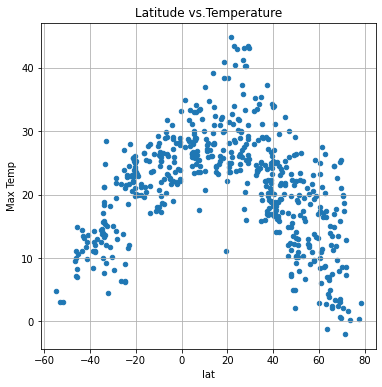

In [24]:
#Latitude vs. Temperature Plot
clean_data.plot(kind="scatter", x="lat", y="Max Temp", grid=True, figsize=(6,6),
              title="Latitude vs.Temperature");
plt.savefig("../output_data/lat vs Temp.png") 

## Latitude vs. Humidity Plot

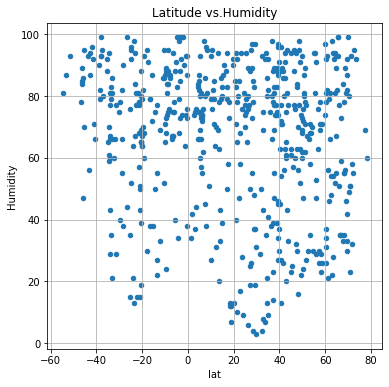

In [25]:
#Latitude vs. Humidity Plot
clean_data.plot(kind="scatter", x="lat", y="Humidity", grid=True, figsize=(6,6),
              title="Latitude vs.Humidity");
plt.savefig("../output_data/lat vs Humidity.png") 

## Latitude vs. Cloudiness Plot

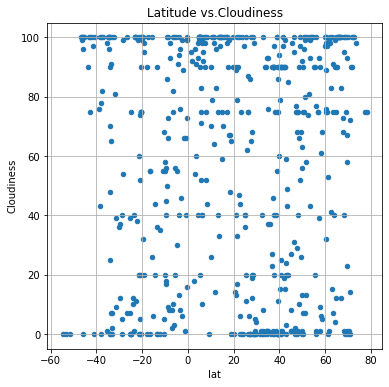

In [26]:
#Latitude vs. Cloudiness Plot
clean_data.plot(kind="scatter", x="lat", y="Cloudiness", grid=True, figsize=(6,6),
              title="Latitude vs.Cloudiness");
plt.savefig("../output_data/lat vs Cloudiness.png") 

## Latitude vs. Wind Speed Plot

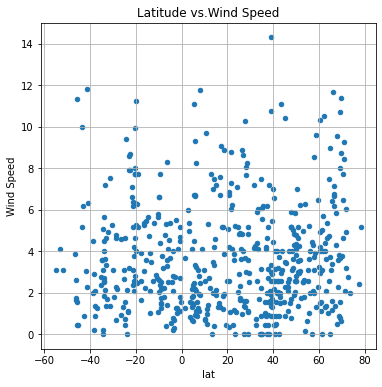

In [27]:
#Latitude vs. Wind Speed Plot
clean_data.plot(kind="scatter", x="lat", y="Wind Speed", grid=True, figsize=(6,6),
              title="Latitude vs.Wind Speed");
plt.savefig("../output_data/lat vs Wind Speed.png") 

## Linear Regression

In [ ]:
#separate the plots into
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude)

In [45]:
#setup a Northern Hemishpere dataframe
Northern_Hemisphere=weather_data_df.loc[weather_data_df["lat"]>=0.00]
Northern_Hemisphere.head()                                                     

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
1,Tomigusuku,127.6750,26.1850,30.08,80,3.60,75,JP,1623487179
2,Havelock,-76.9013,34.8791,25.01,92,2.24,37,US,1623487179
3,Tarko-Sale,77.7850,64.9225,15.00,89,8.99,100,RU,1623487179
7,Severo-Kuril'sk,156.1250,50.6789,10.13,81,3.53,96,RU,1623487180
8,Salalah,54.0924,17.0151,31.05,79,6.69,75,OM,1623487092


In [44]:
#setup a Southern Hemishpere dataframe
Southern_Hemisphere=weather_data_df.loc[weather_data_df["lat"]<0.00]
Southern_Hemisphere.describe()   

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02
mean,28.240240,-21.562957,19.594365,71.657459,3.616519,54.602210,1.623487e+09
std,94.174734,13.506889,6.776165,21.366480,2.454595,39.588113,8.117793e+01
min,-175.200000,-54.800000,3.030000,13.000000,0.000000,0.000000,1.623487e+09
25%,-56.033300,-33.141600,13.840000,64.000000,1.770000,10.000000,1.623487e+09
50%,24.731400,-20.733300,21.320000,77.000000,3.090000,56.000000,1.623487e+09
75%,120.264100,-9.443100,25.090000,88.000000,5.140000,99.000000,1.623487e+09
max,178.004200,-0.216700,33.140000,100.000000,11.830000,100.000000,1.623487e+09


In [39]:
max_temp=Northern_Hemisphere.iloc[:,3]
max_temp

1      30.08
2      25.01
3      15.00
7      10.13
8      31.05
       ...  
554     9.95
555    18.84
557    28.22
558    34.70
559    11.11
Name: Max Temp, Length: 379, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

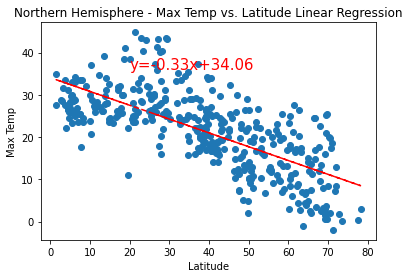

the correlation between weight and tumor volume is -0.7
R squared: 0.49294017414658053


<Figure size 432x288 with 0 Axes>

In [57]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
max_temp=Northern_Hemisphere.iloc[:,3]
correlation=st.pearsonr(lat,max_temp)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,max_temp)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,max_temp)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between weight and tumor volume is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}")  
plt.savefig("../output_data/Northern Hemisphere lat vs Max temp linear regressoin.png") 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

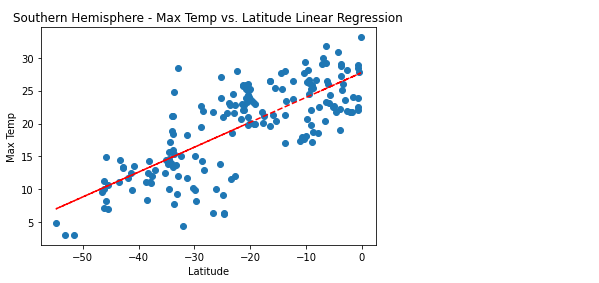

the correlation between weight and tumor volume is 0.75
R squared: 0.5698222009519583


<Figure size 432x288 with 0 Axes>

In [56]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
max_temp=Southern_Hemisphere.iloc[:,3]
correlation=st.pearsonr(lat,max_temp)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,max_temp)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,max_temp)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between weight and tumor volume is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}")

plt.savefig("../output_data/Southern Hemisphere lat vs Max temp linear regressoin.png") 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

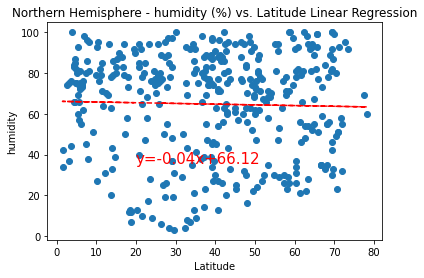

the correlation between Latitude and humidity is -0.03
R squared: 0.0007860296866962081


<Figure size 432x288 with 0 Axes>

In [58]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
humidity=Northern_Hemisphere.iloc[:,4]
correlation=st.pearsonr(lat,humidity)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,humidity)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,humidity)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title("Northern Hemisphere - humidity (%) vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between Latitude and humidity is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Humidity linear regressoin.png") 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

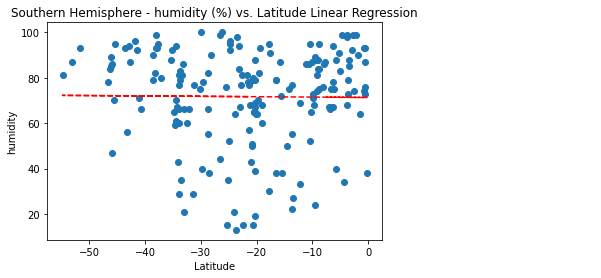

the correlation between Latitude and humidity is -0.01
R squared: 0.00011158585730602383


<Figure size 432x288 with 0 Axes>

In [59]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
humidity=Southern_Hemisphere.iloc[:,4]
correlation=st.pearsonr(lat,humidity)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,humidity)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,humidity)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title("Southern Hemisphere - humidity (%) vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between Latitude and humidity is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southernn_Hemisphere lat vs Humidity linear regressoin.png") 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

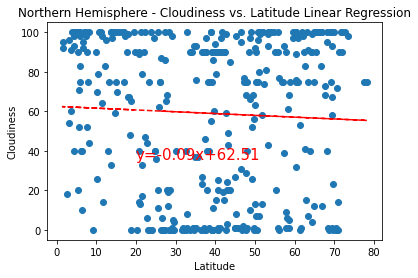

the correlation between Latitude and Cloudiness is -0.05
R squared: 0.0022481800363764307


<Figure size 432x288 with 0 Axes>

In [61]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
Cloudiness=Northern_Hemisphere.iloc[:,6]
correlation=st.pearsonr(lat,Cloudiness)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Cloudiness)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Cloudiness)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Cloudiness linear regressoin.png") 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

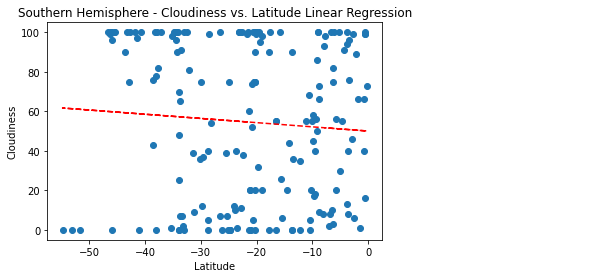

the correlation between Latitude and Cloudiness is -0.07
R squared: 0.005266284987847928


<Figure size 432x288 with 0 Axes>

In [60]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
Cloudiness=Southern_Hemisphere.iloc[:,6]
correlation=st.pearsonr(lat,Cloudiness)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Cloudiness)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Cloudiness)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southernn_Hemisphere lat vs Cloudiness linear regressoin.png") 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

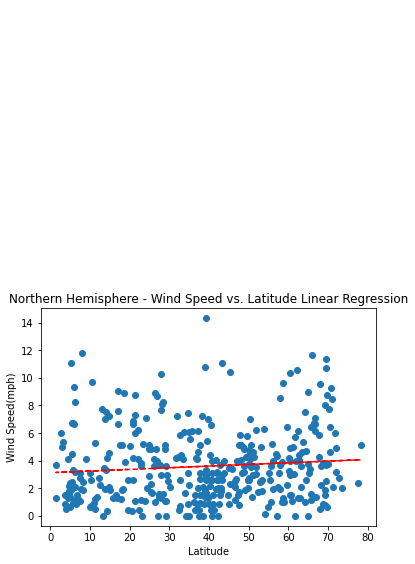

the correlation between Latitude and Wind Speed is 0.09
R squared: 0.008371013433588887


<Figure size 432x288 with 0 Axes>

In [62]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
Wind_Speed=Northern_Hemisphere.iloc[:,5]
correlation=st.pearsonr(lat,Wind_Speed)
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Wind_Speed)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Wind_Speed)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Wind Speed linear regressoin.png") 


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

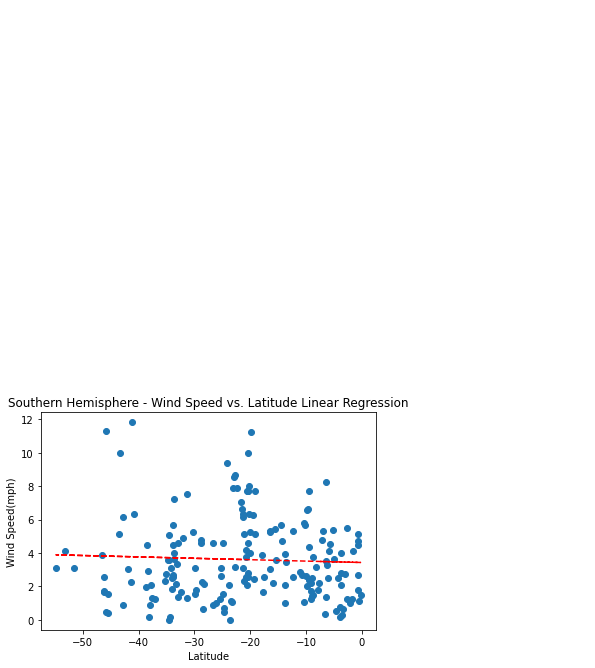

the correlation between Latitude and Wind Speed is -0.05
R squared: 0.002115881033564937


<Figure size 432x288 with 0 Axes>

In [63]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
Wind_Speed=Southern_Hemisphere.iloc[:,5]
correlation=st.pearsonr(lat,Wind_Speed)
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Wind_Speed)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Wind_Speed)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()  
print(f"the correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southern_Hemisphere lat vs Wind Speed linear regressoin.png") 